In [7]:
import pickle 
import pprint as pp
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt

In [1]:
#This program loads the train and test data sets and runs the baseline OLS regression and runs out of sample testing

In [8]:
#Load Test and Train Data
train = pd.read_csv('Trac_USSC_train.csv', index_col = 0)
test = pd.read_csv('Trac_USSC_test.csv', index_col = 0)

In [10]:
X_train = train.drop(['songername', 'demean_logprisonsentmonths', 'year29', 'judge_religion3', 'judge_rating3', 'judge_race1', 'judge_party1'], axis = 1)
X_train['intercept'] = 1
Y_train = train['demean_logprisonsentmonths']
X_test = test.drop(['songername', 'demean_logprisonsentmonths', 'year29', 'judge_religion3', 'judge_rating3', 'judge_race1', 'judge_party1'], axis = 1)
X_test['intercept'] = 1
Y_test = test['demean_logprisonsentmonths']

In [11]:
regr = linear_model.LinearRegression(fit_intercept = False)
regr.fit(X_train, Y_train)
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
regr.get_params

Coefficients: 
 [  1.22476706e+00   3.28223754e-02   1.52923456e-04   1.68635843e-01
  -1.01389922e-01  -1.16881813e+00   4.24083295e-02  -5.62144630e-01
  -4.38026773e-02  -9.23615771e-01  -6.03699229e-01  -3.23794379e-01
  -3.83810866e-01  -4.57313820e-01  -3.30658831e-01  -3.18062090e-01
  -3.22393484e-01  -4.02811112e-01  -3.36824230e-01  -2.65114841e-01
  -1.96483448e-01  -2.05920090e-01  -1.91206468e-01  -1.28611799e-01
  -7.52369396e-02  -3.77046048e-02  -1.01847642e-02  -1.28036714e-02
   6.48835831e-04   9.78425243e-03  -3.33955432e-03   3.69770045e-03
   9.73999833e-03   3.11619244e-02   4.22201828e-02   4.30390224e-02
   4.66044967e-02  -9.20761027e-02  -1.68375826e-01  -1.57387256e-01
  -1.01648078e-01  -8.00051189e-02  -1.50988918e-01   3.55220497e-02
  -2.29928667e-02  -6.59325831e-02  -1.02916093e-01  -9.49768237e-02
  -1.08847345e-01  -3.02541497e-01   2.90561272e-02  -3.26412946e-01
  -9.73589990e-02   7.64892057e-02   3.79248517e-01  -3.01219617e-01
  -2.51032017e-01 

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)>

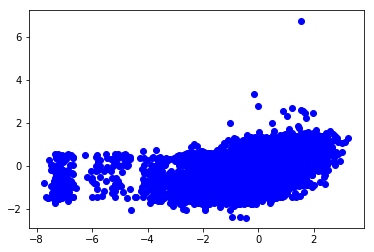

In [16]:
plt.scatter(Y_test, regr.predict(X_test), color='blue')
plt.show()